In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn 
import sklearn
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve

In [8]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [13]:
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [48]:
data_df=data_df.drop("Unnamed: 0",axis=1)

In [49]:
data_df.shape

(1525, 9)

In [50]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [51]:
data_df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [52]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [53]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [54]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [150]:
data_df.drop_duplicates(keep = False, inplace = True)

In [151]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [148]:
data_df.vote.value_counts(normalize="True")

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [149]:
data_df.gender.value_counts(normalize="True")

female    0.532459
male      0.467541
Name: gender, dtype: float64

# Univariate Analysis

In [57]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'economic boxplot')

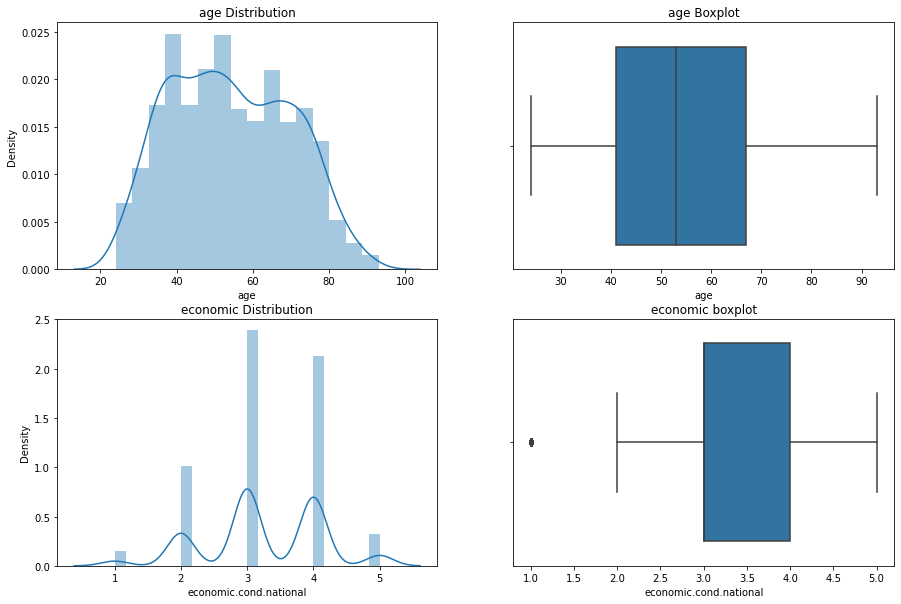

In [58]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(data_df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=12)

a = sns.boxplot(data_df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=12)

a=sns.distplot(data_df['economic.cond.national'], ax=axes[1][0])
a.set_title("economic Distribution",fontsize=12)

a=sns.boxplot(data_df['economic.cond.national'],orient="v", ax=axes[1][1])
a.set_title("economic boxplot", fontsize=12)



Text(0.5, 1.0, 'Blair boxplot')

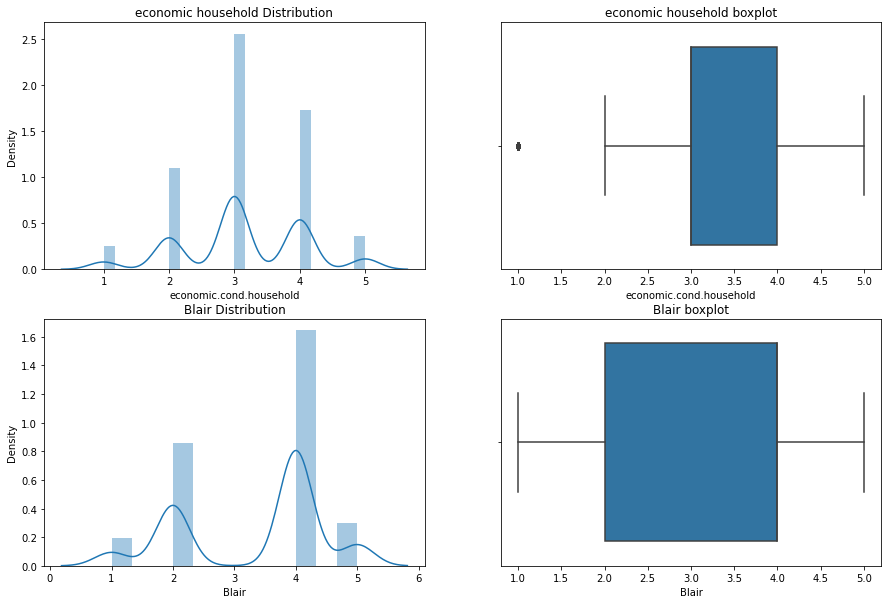

In [59]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a=sns.distplot(data_df['economic.cond.household'], ax=axes[0][0])
a.set_title("economic household Distribution",fontsize=12)

a=sns.boxplot(data_df['economic.cond.household'],orient="v", ax=axes[0][1])
a.set_title("economic household boxplot", fontsize=12)

a=sns.distplot(data_df['Blair'], ax=axes[1][0])
a.set_title("Blair Distribution",fontsize=12)

a=sns.boxplot(data_df['Blair'],orient="v", ax=axes[1][1])
a.set_title("Blair boxplot", fontsize=12)

Text(0.5, 1.0, 'Europe boxplot')

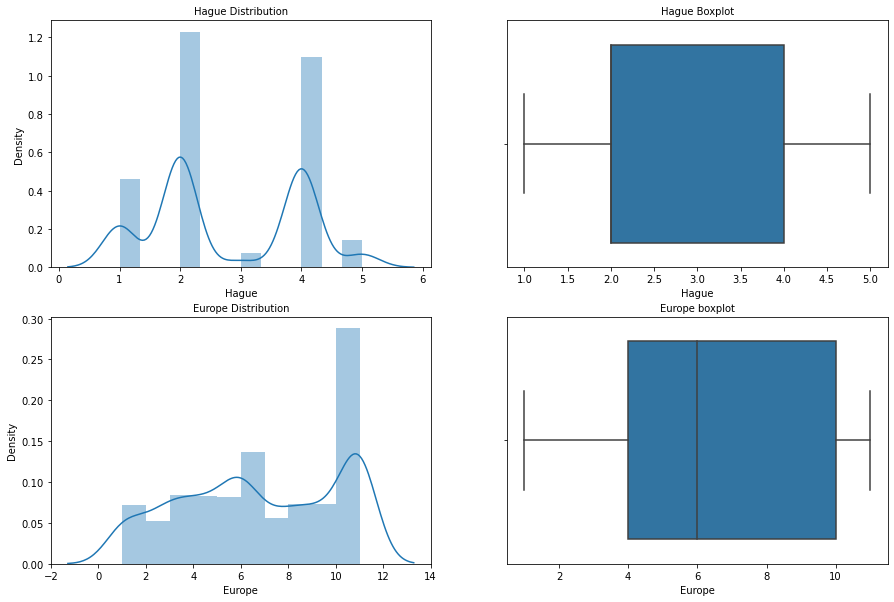

In [60]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(data_df['Hague'] , ax=axes[0][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(data_df['Hague'] , orient = "v" , ax=axes[0][1])
a.set_title("Hague Boxplot",fontsize=10)

a=sns.distplot(data_df['Europe'], ax=axes[1][0])
a.set_title("Europe Distribution",fontsize=10)

a=sns.boxplot(data_df['Europe'],orient="v", ax=axes[1][1])
a.set_title("Europe boxplot", fontsize=10)



Text(0.5, 1.0, 'political knowledge boxplot')

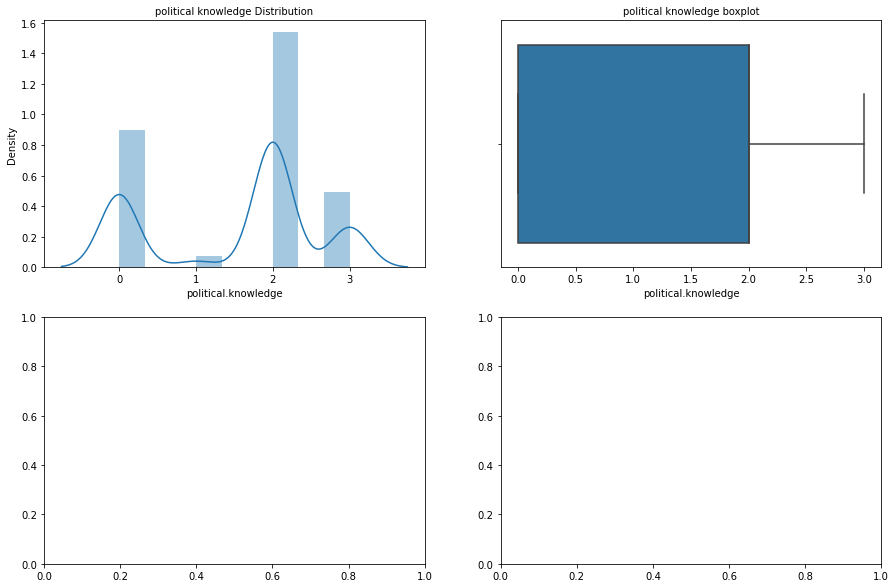

In [42]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,10)
a=sns.distplot(data_df['political.knowledge'], ax=axes[0][0])
a.set_title("political knowledge Distribution",fontsize=10)

a=sns.boxplot(data_df['political.knowledge'],orient="v", ax=axes[0][1])
a.set_title("political knowledge boxplot", fontsize=10)

In [152]:
data_df.skew(axis = 0, skipna = True)

age                        0.134944
economic.cond.national    -0.236477
economic.cond.household   -0.138688
Blair                     -0.543655
Hague                      0.140236
Europe                    -0.147907
political.knowledge       -0.418982
dtype: float64

# Bivariate and Multivariate Analysis

<Figure size 72x144 with 0 Axes>

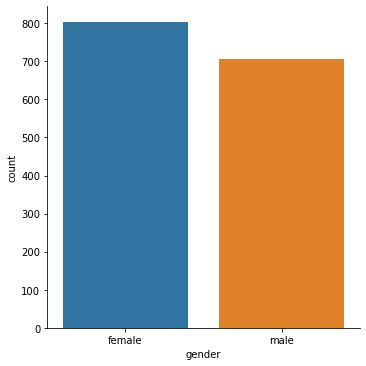

In [160]:
plt.figure(figsize=(1,2))
sns.catplot('gender', kind='count', data=data_df)

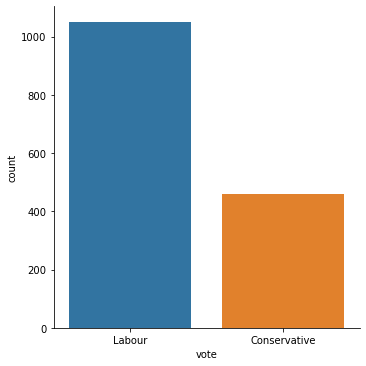

In [161]:
sns.catplot('vote', kind='count', data=data_df)

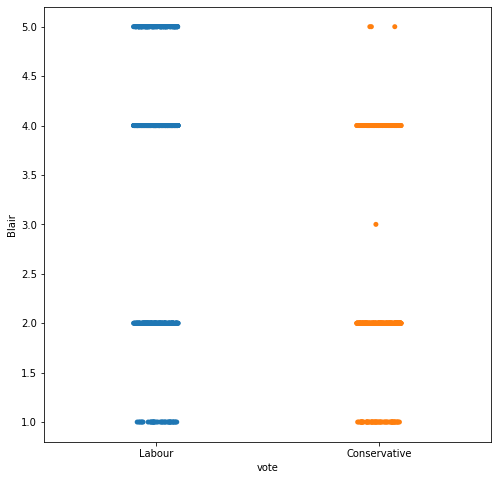

In [63]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Blair'], jitter=True) 
plt.show()

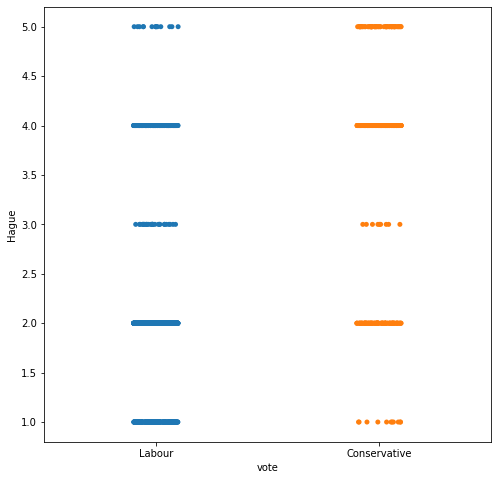

In [64]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Hague'], jitter=True) 
plt.show()

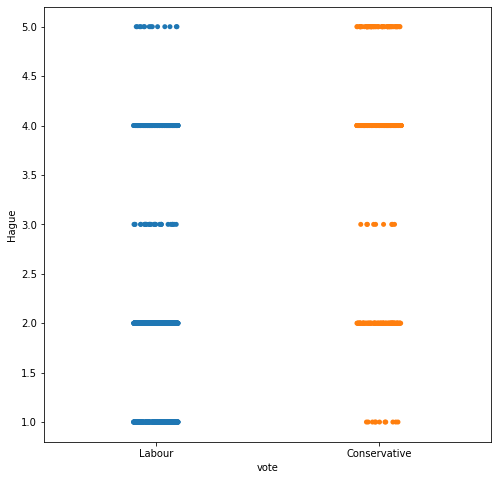

In [65]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['Hague'], jitter=True) 
plt.show()

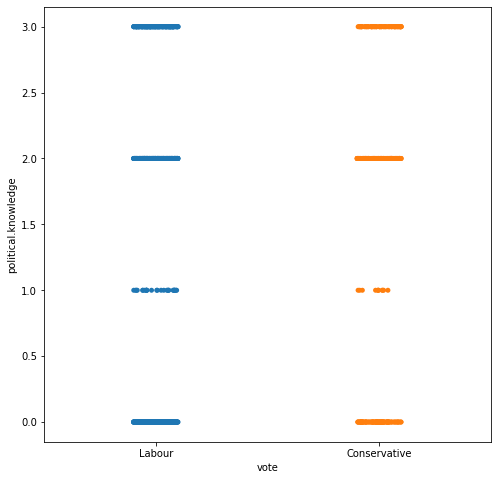

In [66]:
plt.figure(figsize=(8,8))
sns.stripplot(data_df["vote"], data_df['political.knowledge'], jitter=True) 
plt.show()

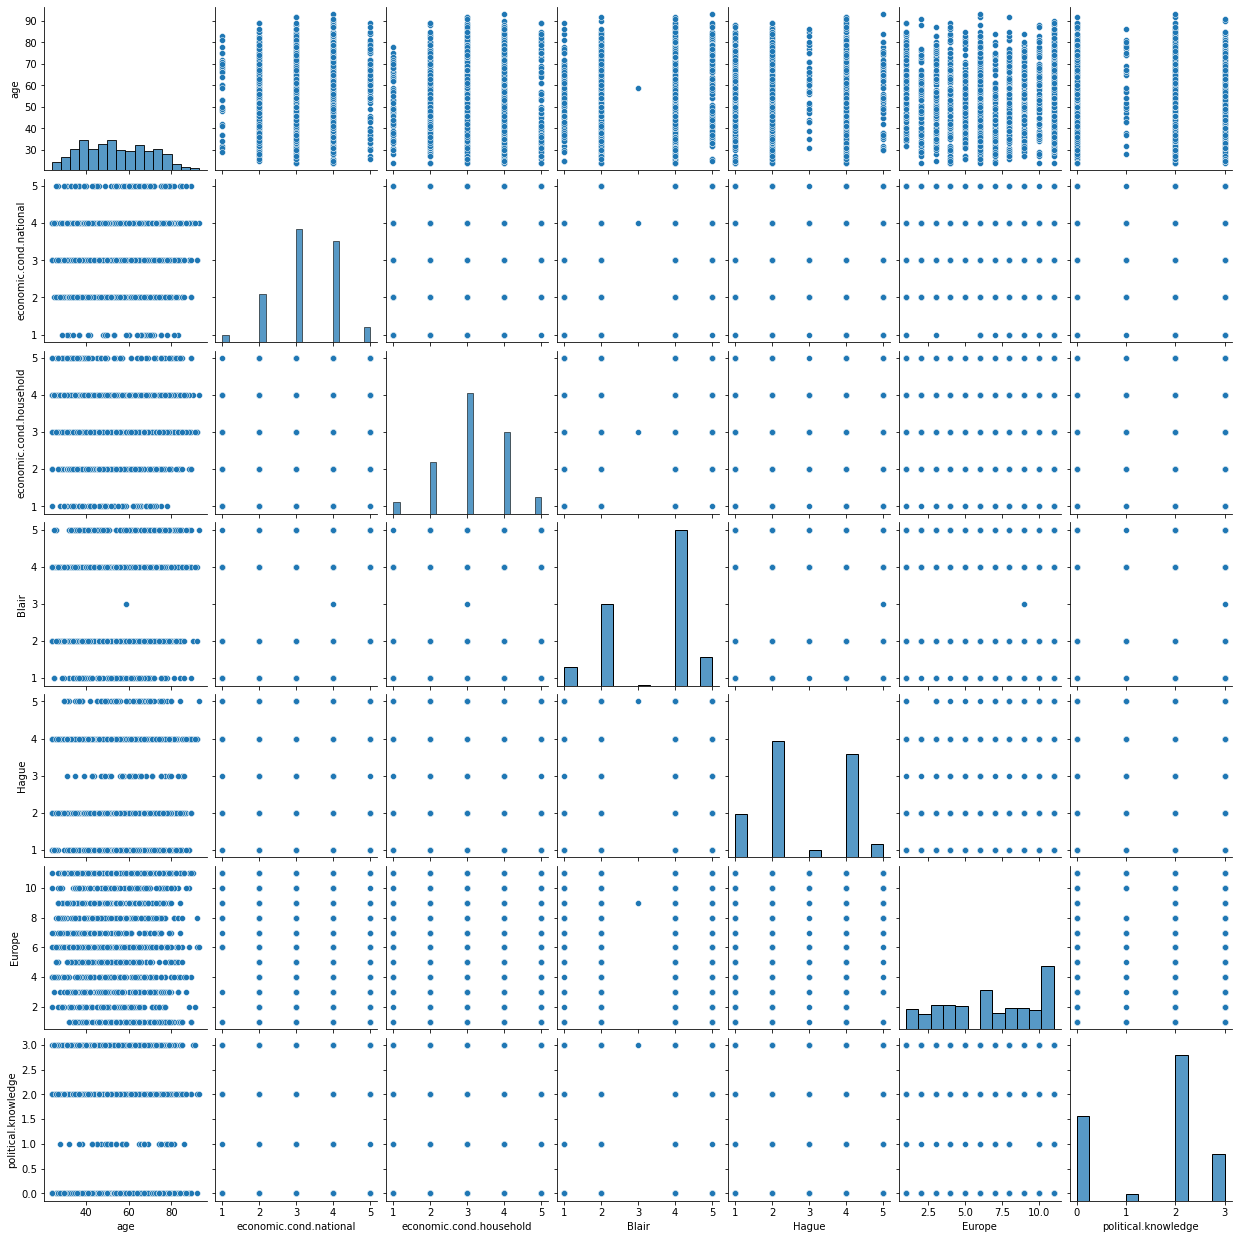

In [67]:
sns.pairplot(data_df)

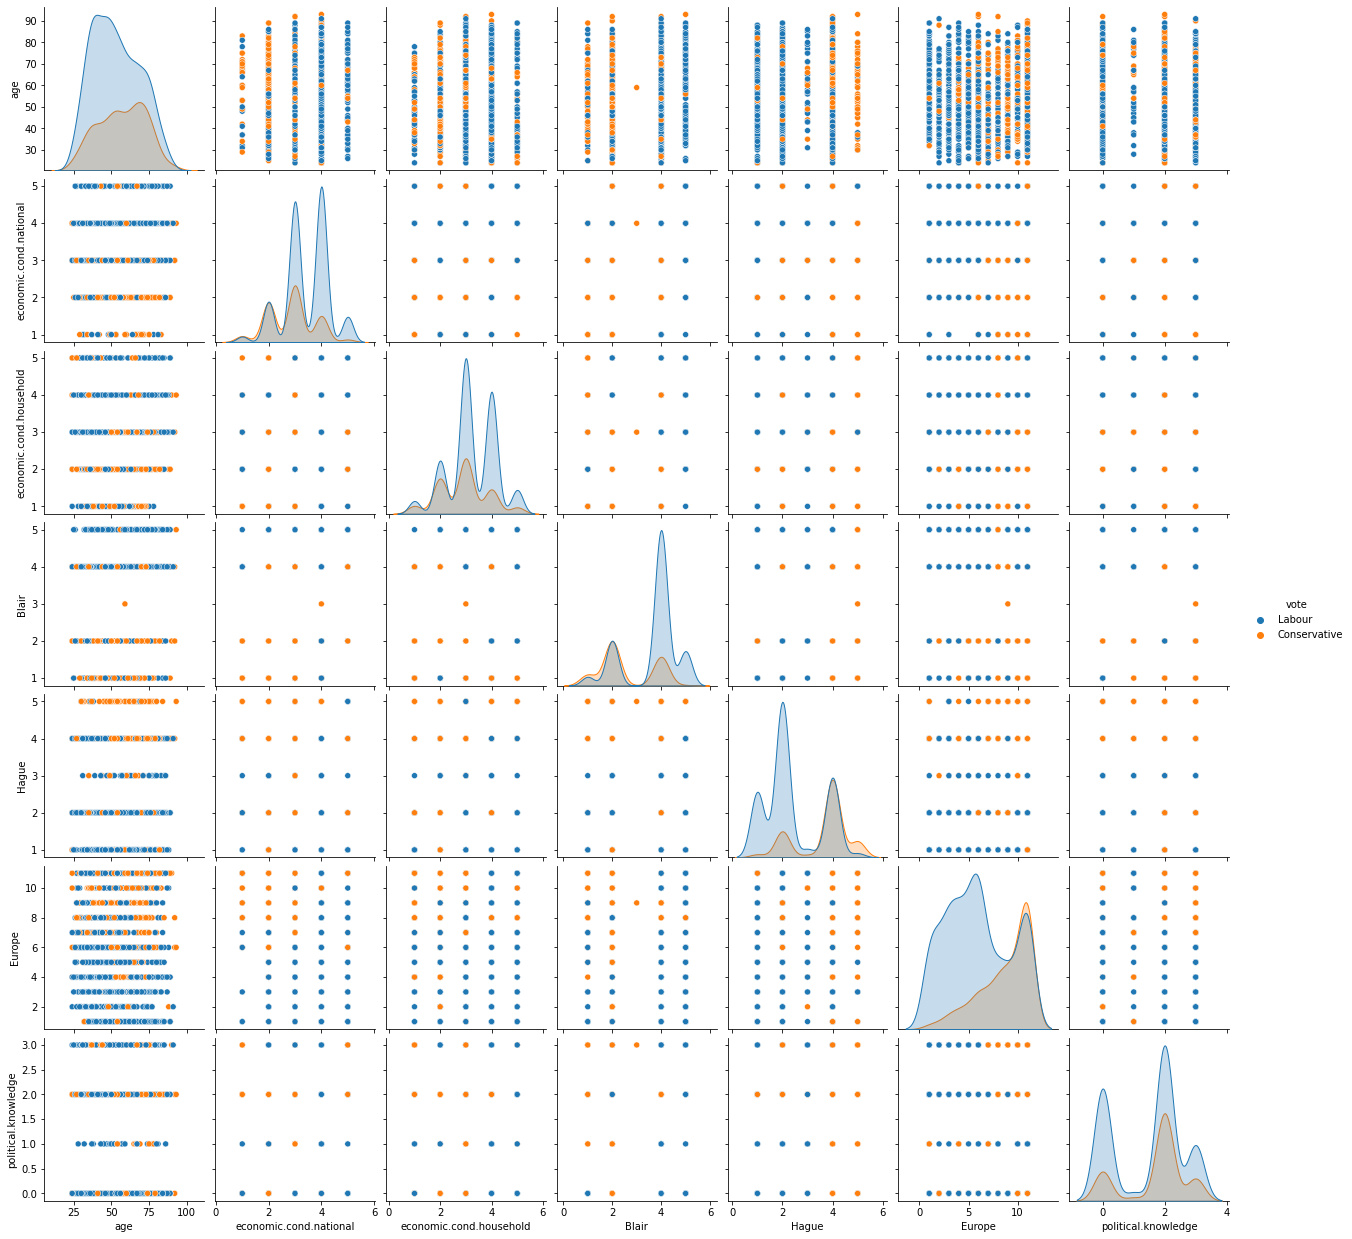

In [68]:
sns.pairplot(data_df, hue="vote")

<AxesSubplot:>

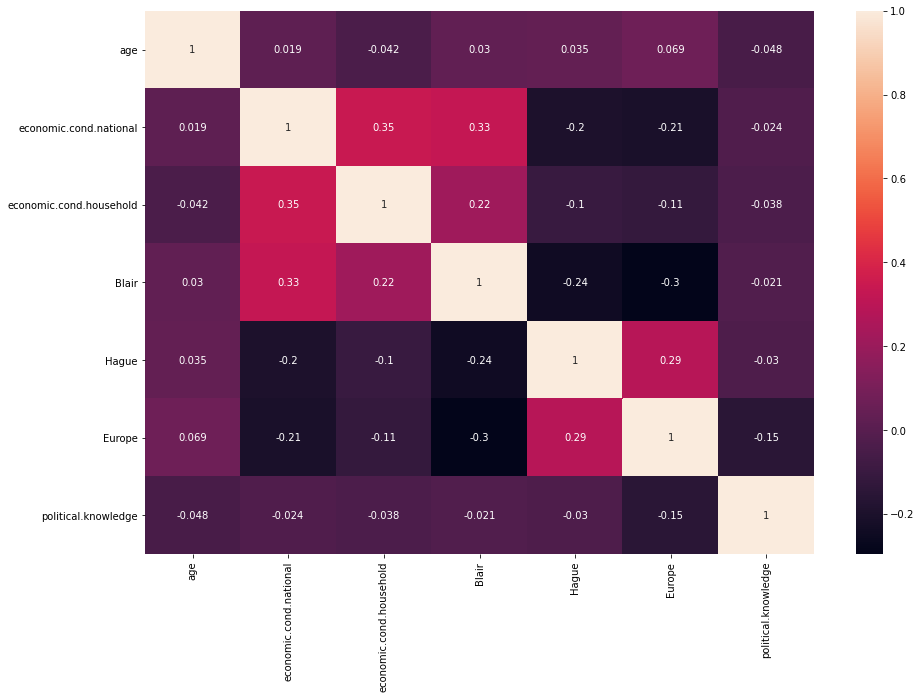

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(),annot=True)

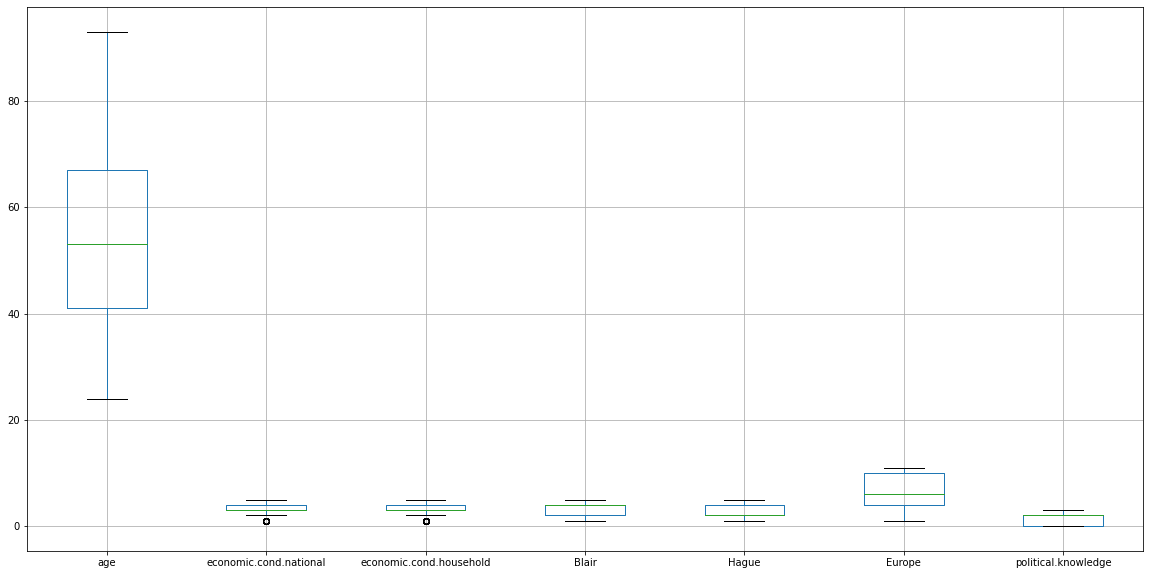

In [71]:
plt.figure(figsize=(20,10))
data_df.boxplot()
plt.show()

In [72]:
cat1 = ['vote', 'gender']

In [73]:
df =pd.get_dummies(data_df, columns=cat1,drop_first=True)

In [74]:
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1525 non-null   int64
 1   economic.cond.national   1525 non-null   int64
 2   economic.cond.household  1525 non-null   int64
 3   Blair                    1525 non-null   int64
 4   Hague                    1525 non-null   int64
 5   Europe                   1525 non-null   int64
 6   political.knowledge      1525 non-null   int64
 7   IsLabour_or_not          1525 non-null   uint8
 8   IsMale_or_not            1525 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 86.5 KB


In [75]:
df= df.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'IsMale_or_not'},inplace= False)


In [76]:
df.sample(10)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_not,IsMale_or_not
302,75,4,3,4,2,9,0,1,0
320,80,3,3,5,1,4,2,1,0
907,30,3,3,2,4,8,0,0,0
372,42,3,4,4,2,4,3,1,1
682,75,3,4,4,4,11,2,0,0
1248,75,4,3,4,5,7,3,0,0
328,43,3,3,4,1,7,2,1,0
892,66,4,3,2,1,6,3,1,0
532,78,2,3,4,5,11,1,0,1
1288,32,4,2,2,4,5,3,0,1


# Naive Bayes

In [80]:
X=df.drop('IsLabour_or_not',axis=1)
Y=df['IsLabour_or_not']

In [81]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [83]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.70, random_state=1)

In [84]:
NB_model=GaussianNB()
NB_model.fit(X_train, Y_train)

GaussianNB()

In [85]:
Y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, Y_train)
print(model_score)
print(metrics.confusion_matrix(Y_train,Y_train_predict))

print(metrics.classification_report(Y_train,Y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



the auc 0.886 


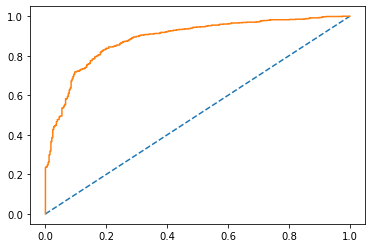

In [86]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [87]:
Y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, Y_test)
print(model_score)
print(metrics.confusion_matrix(Y_test,Y_test_predict))

print(metrics.classification_report(Y_test,Y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



the auc curve 0.885 


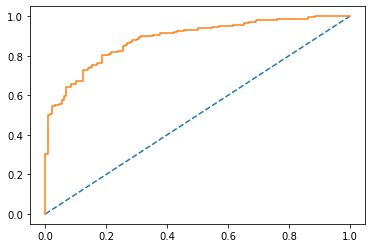

In [88]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


# KNN

In [91]:
x = df.drop("IsLabour_or_not",axis=1)

y=df["IsLabour_or_not"]

In [92]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [93]:
from scipy.stats import zscore

In [94]:
x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']]=x[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','IsMale_or_not']].apply(zscore)

In [95]:
x.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=1)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)

In [99]:
print(KNN_model_score)

0.8678915135608049


In [100]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[263  88]
 [ 63 729]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.83      0.84      1143
weighted avg       0.87      0.87      0.87      1143



# AUC ROC Curve KNN Train

the auc 0.932 


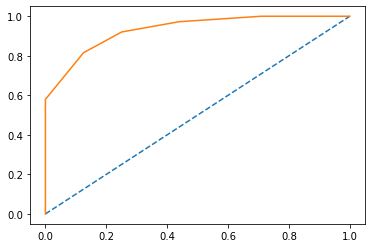

In [101]:
probs_train=KNN_model.predict_proba(x_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [102]:
y_test_predict=KNN_model.predict(x_test)

KNN_model_score=KNN_model.score(x_test, y_test)

print(KNN_model_score)

0.824607329842932


In [103]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 81  30]
 [ 37 234]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



# AUC ROC Curve KNN Test

the auc curve 0.870 


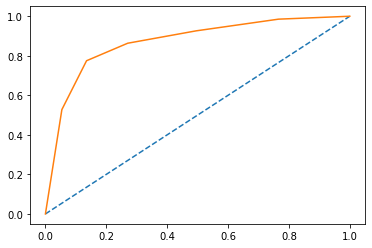

In [104]:
probs_test=KNN_model.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [105]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [106]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8530183727034121
[[253  98]
 [ 70 722]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       351
           1       0.88      0.91      0.90       792

    accuracy                           0.85      1143
   macro avg       0.83      0.82      0.82      1143
weighted avg       0.85      0.85      0.85      1143



In [107]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8350785340314136
[[ 84  27]
 [ 36 235]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       111
           1       0.90      0.87      0.88       271

    accuracy                           0.84       382
   macro avg       0.80      0.81      0.80       382
weighted avg       0.84      0.84      0.84       382



In [108]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.23298429319371727,
 0.19633507853403143,
 0.17539267015706805,
 0.16492146596858637,
 0.17801047120418845,
 0.17277486910994766,
 0.17539267015706805,
 0.18586387434554974,
 0.17801047120418845,
 0.17277486910994766]

# AUC ROC curve after n classifier for train data set

the auc curve 0.904 


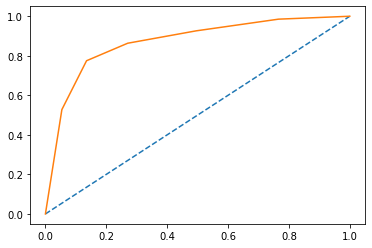

In [109]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


# AUC ROC curve after n classifier for test data set

the auc curve 0.900 


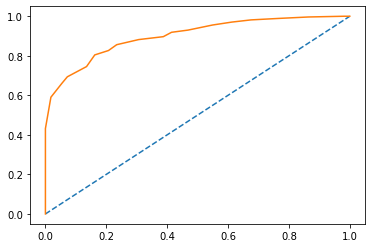

In [110]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

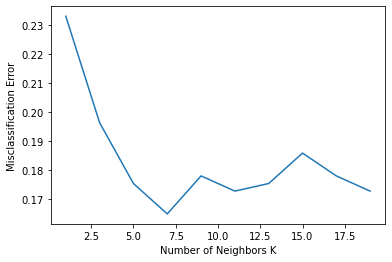

In [111]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Discriminant Analysis

In [112]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [114]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [115]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,Y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



# AUC ROC curve for LDA Train

the auc 0.889 


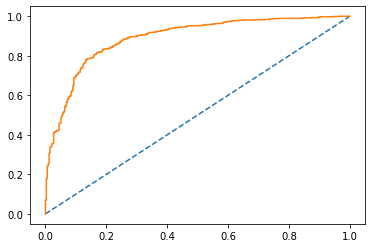

In [116]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(Y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(Y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr);

In [117]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,Y_test)
print(LDA_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



# AUC ROC curve for LDA Test

the auc curve 0.884 


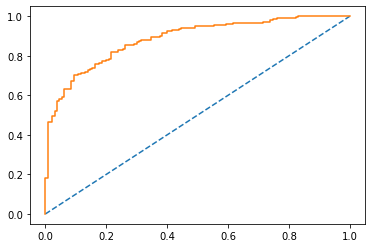

In [118]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(Y_test,probs_test)
print("the auc curve %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(Y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)


# Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [121]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,Y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [122]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.616214,0.383786
1,0.186461,0.813539
2,0.187993,0.812007
3,0.163937,0.836063
4,0.052483,0.947517


In [123]:
Logistic_model.score(X_train,Y_train)

0.8406747891283973

# AUC ROC curve for Logistic Regression Train

AUC: 0.889


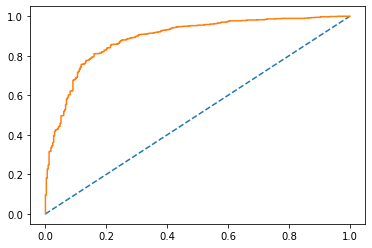

In [124]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [125]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,Y_test)
print(Logistic_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [126]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.933649,0.066351
1,0.689194,0.310806
2,0.333481,0.666519
3,0.477407,0.522593
4,0.157152,0.842848


# AUC ROC curve for Logistic Regression Test

AUC: 0.882


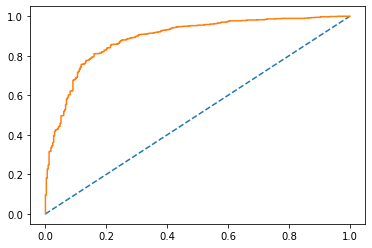

In [127]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr);

# Model tuning

# Bagging Train

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=1)

In [129]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [166]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10, random_state=1)

Bagging_model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [167]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,Y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.9812558575445174
[[326   6]
 [ 14 721]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       332
           1       0.99      0.98      0.99       735

    accuracy                           0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067



# AUC _ROC Curve Bagging Train

AUC: 0.998


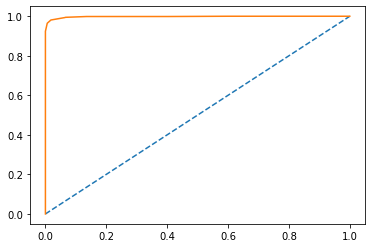

In [168]:

probs = Bagging_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

# Bagging Test

In [169]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,Y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))

0.8144104803493449
[[ 91  39]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       130
           1       0.88      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.82       458



# AUC _ROC Curve Bagging Test

AUC: 0.863


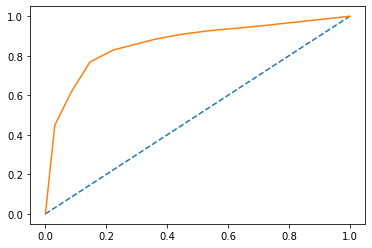

In [170]:

probs_test = Bagging_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

# Boosting Train

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [137]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,Y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


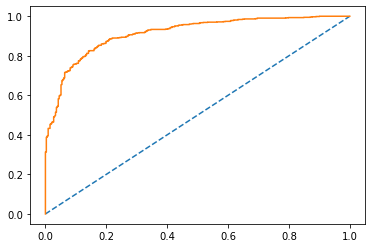

In [138]:

probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

# Gradient Boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [140]:

y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, Y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, y_train_predict))

0.8865979381443299
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



AUC: 0.950


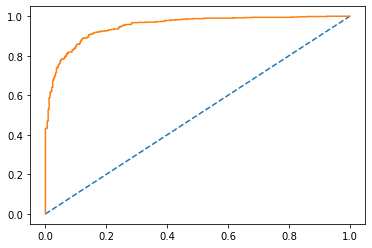

In [141]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

# ADA Boosting Test

In [142]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, Y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8187772925764192
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



# AUC _ROC  Curve Boosting Test

AUC: 0.879


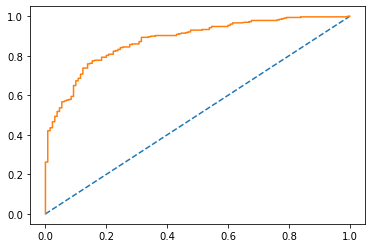

In [143]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

# Gradient Boosting Test

In [144]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, Y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))

0.8318777292576419
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



# Gradient Boosting AUC_ROC Curve Test

AUC: 0.904


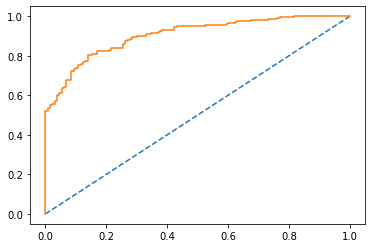

In [145]:

probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(Y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)